In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
len(X_train)

60000

In [ ]:
len(X_test)

10000

In [ ]:
y_train[5]

2

In [ ]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

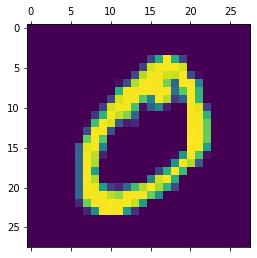

In [ ]:
 plt.matshow(X_train[1])


In [ ]:
y_train[1]

0

In [ ]:
X_train = X_train/255
X_text = X_test / 255

In [ ]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(100, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'softmax')

])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['sparse_categorical_accuracy']
        )

model.fit(X_train, y_train, epochs=6)

Epoch 1/6
1875/1875 [==============================] - 7s 2ms/step - loss: 0.2742 - sparse_categorical_accuracy: 0.9226
Epoch 2/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1264 - sparse_categorical_accuracy: 0.9633
Epoch 3/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - sparse_categorical_accuracy: 0.9735
Epoch 4/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - sparse_categorical_accuracy: 0.9795
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0524 - sparse_categorical_accuracy: 0.9839
Epoch 6/6
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0427 - sparse_categorical_accuracy: 0.9865


In [ ]:
X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 14.3227 - sparse_categorical_accuracy: 0.9746


[14.322731018066406, 0.9746000170707703]

In [ ]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
y_predicted

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predicted_labels)

Text(69.0, 0.5, 'Truth')

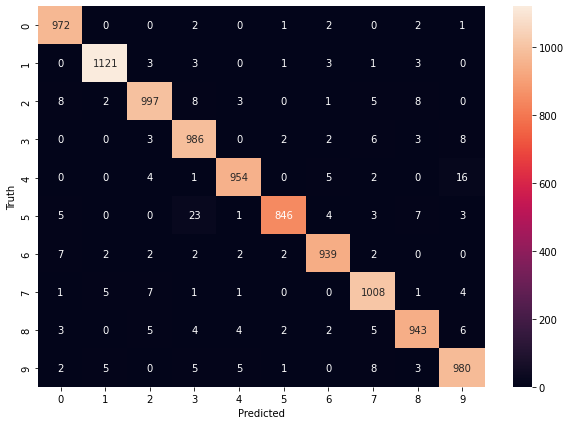

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

